<a href="https://colab.research.google.com/github/MichaelArthur224/Bank_Churn_Pred/blob/main/Bank_Churn_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Welcome To Analysis Of Bank Churn Prediction Dataset

Feature Description:
1. Customer ID - Unique ID given to identify a particular customer.
2. Credit Score - It is the score which determines the creditworthiness of a customer.
3. Country - The country where customer lives.
4. Gender - The Sex of customer.
5. Age - The age of customer.
6. Tenure - Number of years the customer has Bank Account in that Bank.
7. Balance - Amount of money present in customer's bank.
8. Products Number - Number of Products from that Bank.
9. Credit Card - Does the customer own a credit card of that Bank.
10. Active Member - Whether the customer is an active member of that Bank.
11. Estimated Salary - Total Income of the Customer.
12. Churn - Churn (Loss of existing customers) of the Bank.

#Table Of Contents
1. Overview
2. Import Data and Libraries
3. Data Cleaning
4. Visualization
5. Pre Processing
6. Decision Tree
7. KNN Model
8. Boosting
9. Nerual Network
10. Dropout
11. Early Stoping
12. Report

We are have a data set containing 10000 bank customers and if they have churned or not. We are also given information regarding salary, credit score, and more. In this project I build multiple models to predict wether a customer will churn. I use EDA to further understand the data set.

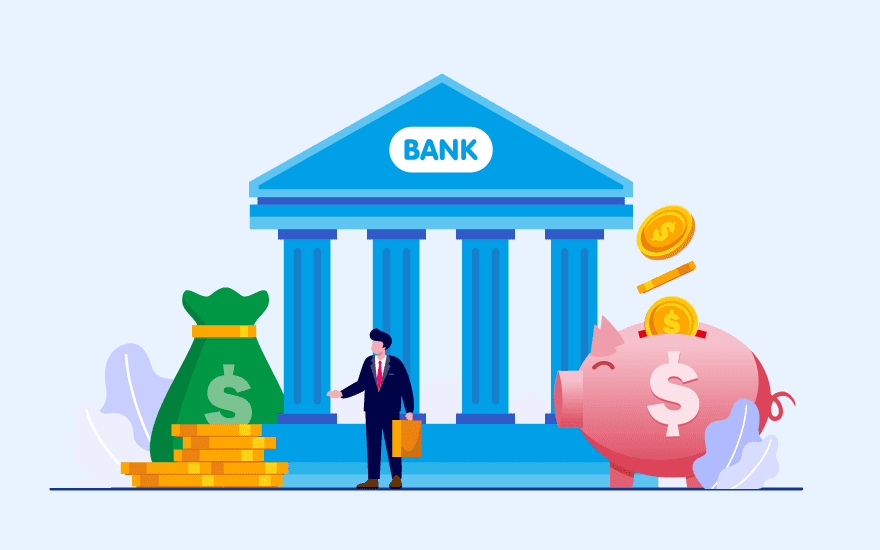

##Import Data and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Bank Churn/Bank Customer Churn Prediction.csv')
df1 = df.copy()
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape
#10000 columns 12 rows

(10000, 12)

In [ ]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

##Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df.nunique()
#Data is already cleaned

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

Woooo! It is cleaned!

##Visualization

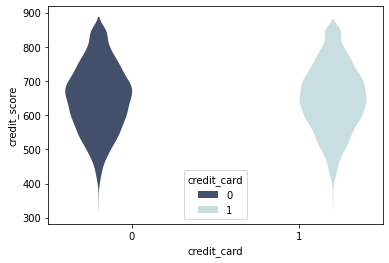

In [ ]:
sns.violinplot(x="credit_card", y="credit_score", hue="credit_card", palette="ch:r=-.2,d=.3_r", linewidth=0, data=df)

##Preprocess

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [ ]:
#The target is churn since that is our prediction
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Establish selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
#Imputer, scaler, OneHotEncoder
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#Categorial Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
#Create tuples
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
#Create ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f43dcaa5650>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f43dcaa55d0>

In [ ]:
#Fitting
preprocessor.fit(X_train)
#Transform
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (7500, 14)




##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Establish Decision Tree
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)

In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
#Fitting to decision tree
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
#Predict
predictions = dec_tree.predict(X_test_processed)

In [ ]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.8390666666666666
0.8464


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test.values, predictions)

In [ ]:
cm_df = pd.DataFrame(cm)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

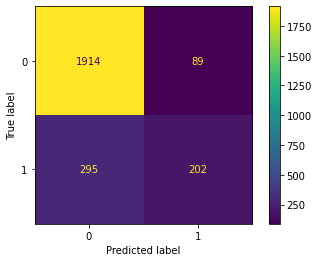

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions);

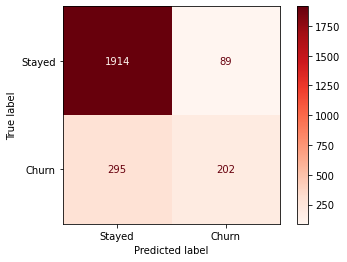

In [ ]:
# Plot the confusion matrix
labels=['Stayed','Churn']
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=labels, cmap='Reds');

1914 Truly Stayed
202 Truly Left

##KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_predictions = knn_pipe.predict(X_test_processed)
knn_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
acc_score = knn_pipe.score(X_test_processed, y_test)
acc_score

0.8284

In [ ]:
knn_train_score = knn_pipe.score(X_train_processed, y_train)
knn_test_score = knn_pipe.score(X_test_processed, y_test)
print(knn_train_score)
print(knn_test_score)

0.8845333333333333
0.8284


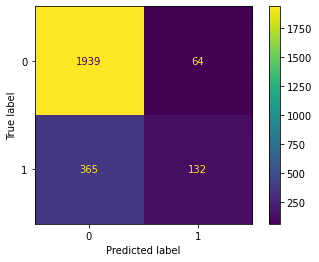

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions);

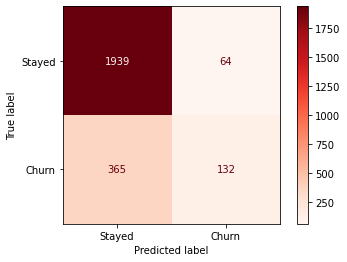

In [ ]:
# Plot the confusion matrix
labels=['Stayed','Churn']
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions, display_labels=labels, cmap='Reds');

1939 Truly Stayed
132 Truly Left

##Boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Establish XGB and fit
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)

XGBClassifier()

In [ ]:
xgb_pipe = make_pipeline(preprocessor, xgb)
xgb_pipe.fit(X_train, y_train)
xgb_preds = xgb_pipe.predict(X_test)
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [ ]:
print('Training accuracy:', xgb.score(X_train_processed, y_train))
print('Testing accuracy:', xgb.score(X_test_processed, y_test))

Training accuracy: 0.8697333333333334
Testing accuracy: 0.8668


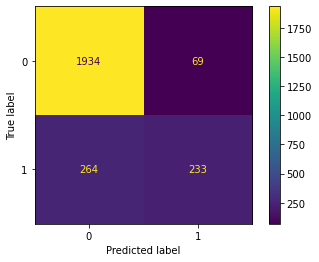

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_preds);

##Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
input_shape = X_train_processed.shape[1]
input_shape

14

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(14, input_dim = input_shape, activation = 'relu')) 
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'bce', optimizer = 'adam')

In [ ]:
history = model.fit(X_train_processed, y_train, validation_data = (X_test_processed, y_test), epochs=100)

Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: 0.6251 - val_loss: 0.4803
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4582 - val_loss: 0.4334
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4274 - val_loss: 0.4130
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4079 - val_loss: 0.3915
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3865 - val_loss: 0.3701
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3692 - val_loss: 0.3590
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3590 - val_loss: 0.3525
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3529 - val_loss: 0.3498
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3492 - val_loss: 0.3498
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3464 - val_lo

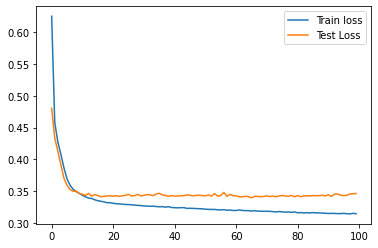

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

##Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
dp_model = Sequential()

dp_model.add(Dense(14, input_dim = input_shape, activation = 'relu')) 
dp_model.add(Dropout(.2))
dp_model.add(Dense(10, activation = 'relu'))
dp_model.add(Dropout(.2))
dp_model.add(Dense(10, activation = 'relu'))
dp_model.add(Dropout(.2))
dp_model.add(Dense(10, activation = 'relu'))
dp_model.add(Dropout(.2))
dp_model.add(Dense(1, activation = 'sigmoid'))
dp_model.compile(loss = 'bce', optimizer = 'adam')
dp_history = dp_model.fit(X_train_processed, y_train, validation_data = (X_test_processed, y_test), epochs=100)

Epoch 1/100
235/235 [==============================] - 2s 4ms/step - loss: 0.5446 - val_loss: 0.4706
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4950 - val_loss: 0.4544
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4739 - val_loss: 0.4339
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4681 - val_loss: 0.4302
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4667 - val_loss: 0.4268
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4652 - val_loss: 0.4305
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4561 - val_loss: 0.4219
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4481 - val_loss: 0.4070
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4390 - val_loss: 0.3959
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4230 - val_lo

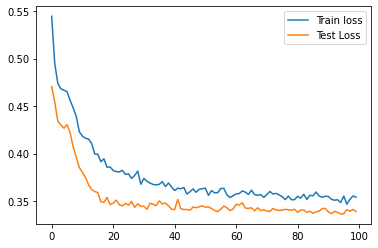

In [ ]:
plt.plot(dp_history.history['loss'], label='Train loss')
plt.plot(dp_history.history['val_loss'], label='Test Loss')
plt.legend();

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2003
           1       0.74      0.50      0.60       497

    accuracy                           0.87      2500
   macro avg       0.81      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500



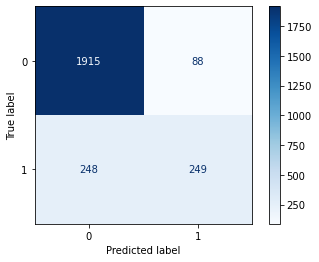

In [ ]:
y_preds_dp = dp_model.predict(X_test_processed)

y_preds_dp = np.round(y_preds_dp)
 
print(classification_report(y_test, y_preds_dp))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds_dp, cmap='Blues');

##Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Sequential model
es_model = Sequential()
es_model.add(Dense(20, input_dim =input_shape, activation = 'relu')) 
es_model.add(Dense(10, activation = 'relu'))
es_model.add(Dense(5, activation = 'relu'))
es_model.add(Dense(1, activation = 'sigmoid'))
es_model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 10)
es_history = es_model.fit(X_train_processed, y_train,validation_data = (X_test_processed, y_test), epochs=100, callbacks = [early_stopping])

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.4870 - val_loss: 0.4295
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4228 - val_loss: 0.4043
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4026 - val_loss: 0.3876
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3798 - val_loss: 0.3670
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3590 - val_loss: 0.3584
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3485 - val_loss: 0.3495
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3446 - val_loss: 0.3471
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3402 - val_loss: 0.3449
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3391 - val_loss: 0.3469
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3374 - val_lo

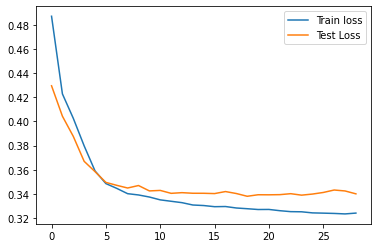

In [ ]:
plt.plot(es_history.history['loss'], label='Train loss')
plt.plot(es_history.history['val_loss'], label='Test Loss')
plt.legend();

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.75      0.45      0.56       497

    accuracy                           0.86      2500
   macro avg       0.81      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



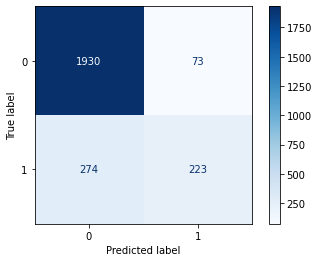

In [ ]:
y_preds = es_model.predict(X_test_processed)

y_preds = np.round(y_preds)
 
print(classification_report(y_test, y_preds))
 
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Blues');

##Report

In [ ]:
models= [KNeighborsClassifier(n_neighbors=2), DecisionTreeClassifier(random_state = 42, max_depth=2), XGBClassifier()]
test_score = []

In [ ]:
for model in models:
    model.fit(X_train_processed, y_train)
    y_pred_r = model.predict(X_test_processed)
    score = accuracy_score(y_test, y_pred_r)
    test_score.append(score)    
    cm = classification_report(y_test, y_pred_r)
    print(model.__class__.__name__)
    print(cm, '\n')

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2003
           1       0.69      0.29      0.41       497

    accuracy                           0.83      2500
   macro avg       0.77      0.63      0.66      2500
weighted avg       0.82      0.83      0.81      2500
 

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2003
           1       0.69      0.41      0.51       497

    accuracy                           0.85      2500
   macro avg       0.78      0.68      0.71      2500
weighted avg       0.83      0.85      0.83      2500
 

XGBClassifier
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg